# Task - 1 Iris Flowers Classification using ML Project

## Author: Nitin Pilkhwal, Data Science Intern at LetsGrowMore

<p>This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.
</p><hr>

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
import warnings
warnings.filterwarnings(action='once')

In [4]:
features = ["sepal_length", "sepal_width","petal_length", "petal_width", "target_class"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names = features) #reading the dataset


<hr>

## Displaying info about data

In [5]:
df.shape

(150, 5)

In [6]:
df.size

750

In [7]:
df.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    target_class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [8]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target_class     object
dtype: object

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target_class    0
dtype: int64

No null value found

In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df['target_class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target_class, dtype: int64

<hr>

## Visualization

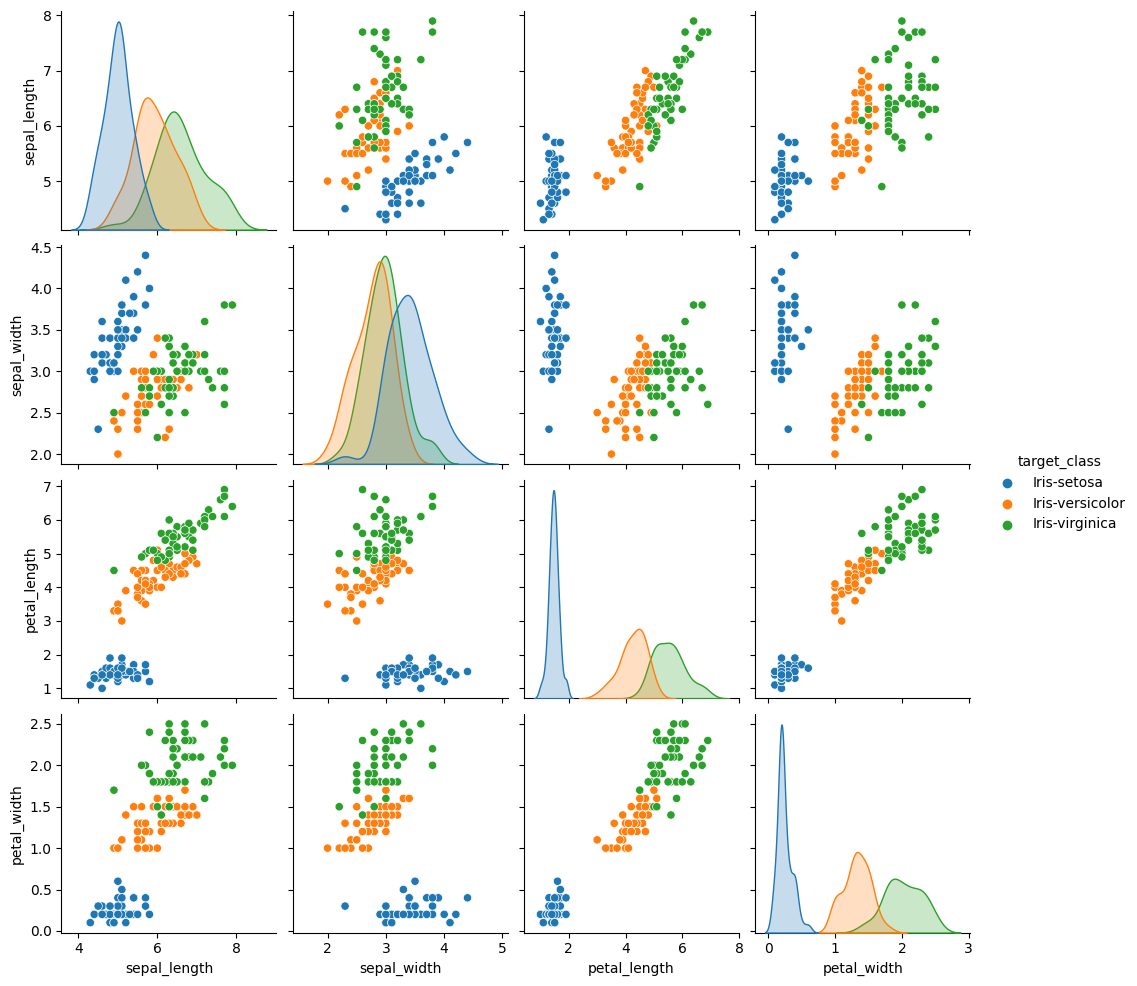

In [13]:
sns.pairplot(df, hue = 'target_class')


In [29]:
data = [df["sepal_length"],df["sepal_width"],df["petal_length"],df["petal_width"]]

{'whiskers': [<matplotlib.lines.Line2D at 0x189d80285b0>,
 'caps': [<matplotlib.lines.Line2D at 0x189d8028a90>,
 'boxes': [<matplotlib.patches.PathPatch at 0x189d80282e0>,
 'medians': [<matplotlib.lines.Line2D at 0x189d8028fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x189d8029270>,
 'means': []}

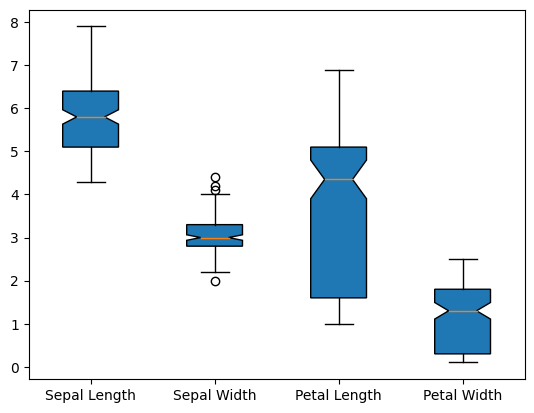

In [33]:
plt.boxplot(data,notch=True,patch_artist=True,labels= ["Sepal Length", "Sepal Width","Petal Length", "Petal Width"])

In [18]:
%%capture --no-display
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


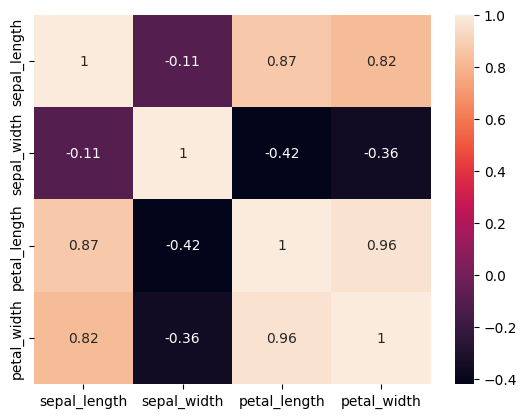

In [19]:
%%capture --no-display
sns.heatmap(df.corr(),annot=True)
plt.show()

<hr>

## Model Training and Evaluation

In [20]:
X = df.drop('target_class', axis = 1)
Y = df['target_class']

In [21]:
X.shape

(150, 4)

In [22]:
Y.shape

(150,)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 ,random_state = 105 )

In [24]:
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

### Model Evaluation

In [25]:
print(model.score(X,Y)*100,"%")

97.33333333333334 %


In [26]:
accuracy = accuracy_score(Y_test,Y_pred)
print(accuracy*100,"%")

96.66666666666667 %


### Plotting Confusion Matrix and Classification Report

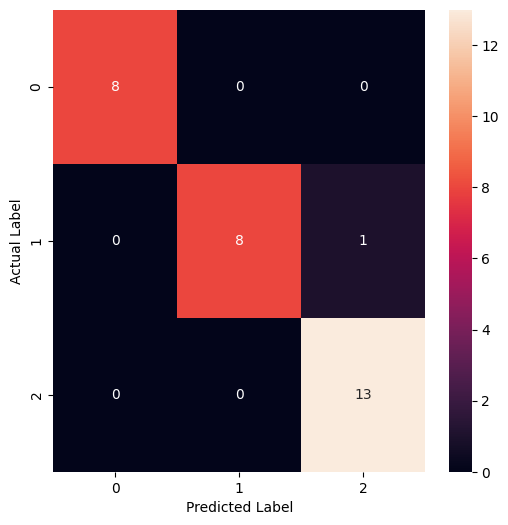

array([[ 8,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 13]], dtype=int64)

In [27]:
plt.figure(figsize = (6, 6))
CM = confusion_matrix(Y_test, Y_pred)
sns.heatmap(CM,annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()
CM

In [28]:
print(classification_report(Y_test, Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



<hr>

# Thank You 🤍